In [1]:
# Familiar imports
import numpy as np
import pandas as pd

# For categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# For training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# For XGBRegressor model
from xgboost import XGBRegressor

# For pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# for visualization
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline              
import seaborn as sns

import random

# Step 1: Divide data in 5 folds
Done in separate notebook and added to this one.

# Step 2: Load the data

In [2]:
# Load the training data
train = pd.read_csv("../input/30days-kfolds/train_folds.csv", index_col=0)
test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)

print ("Data loaded")

Data loaded


# Step 3: Exploratory data analysis (EDA)

In [3]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,0
2,B,B,A,A,B,D,A,F,A,O,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,2
3,A,A,A,C,B,D,A,D,A,F,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
4,B,B,A,C,B,D,A,E,C,K,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,3
6,A,A,A,C,B,D,A,E,A,N,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,1


Data = 10 categorical + 14 numerical

In [4]:
train.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979,2.000000
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555,1.414216
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329,0.000000
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071,1.000000
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373,2.000000
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634,3.000000
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992,4.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

It seems there is no missing values in train data. Let's confirm that in both data sets

In [6]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [7]:
# types of columns
cat_features = ["cat" + str(i) for i in range(10)]
num_features = ["cont" + str(i) for i in range(14)]

## Visualization

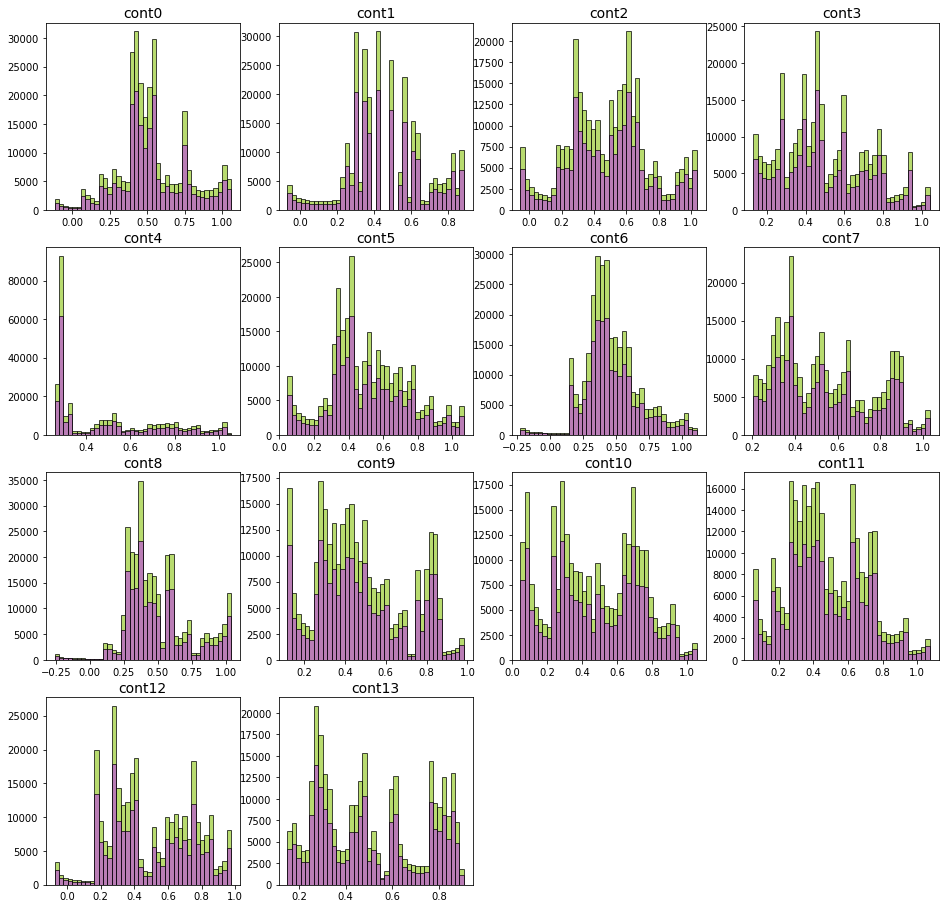

In [8]:
# join train and test sets of numerical columns
num_data = pd.concat([train[num_features], test[num_features]], axis=0)
num_columns = num_data.columns.values
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(16,20), sharex=False)

i=0
for r in range(5):
    for c in range(4):
        if i >= len(num_columns): # If there is no more data columns to make plots from
            axs[r, c].set_visible(False) # Hiding axes so there will be clean background
        else:
            hist1 = axs[r, c].hist(train[num_columns[i]].values,
                                   range=(num_data[num_columns[i]].min(),
                                          num_data[num_columns[i]].max()),
                                   bins=40,
                                   color="yellowgreen",
                                   edgecolor="black",
                                   alpha=0.7,
                                   label="Train Dataset")
            hist2 = axs[r, c].hist(test[num_columns[i]].values,
                                   range=(num_data[num_columns[i]].min(),
                                          num_data[num_columns[i]].max()),
                                   bins=40,
                                   color="mediumorchid",
                                   edgecolor="black",
                                   alpha=0.7,
                                   label="Train Dataset")
            axs[r, c].set_title(num_columns[i], fontsize=14, pad=5)
        i+=1    
plt.show();           

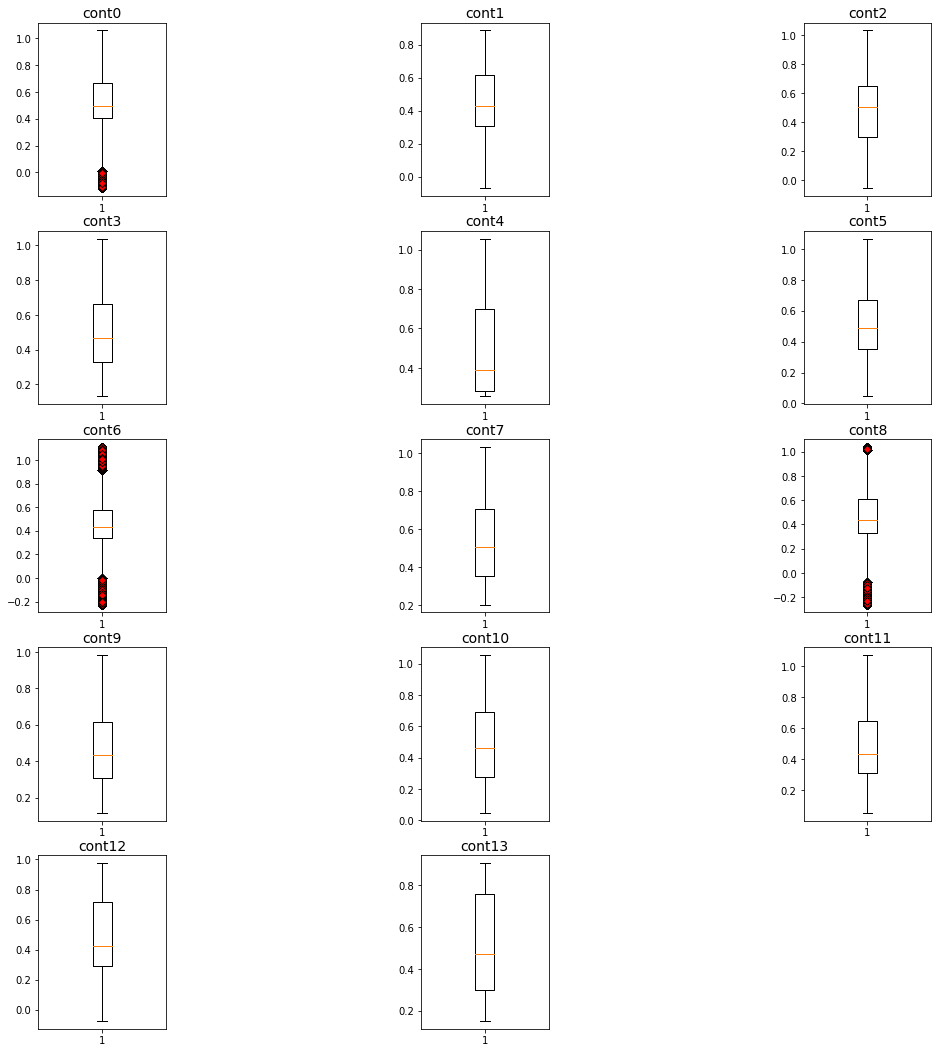

In [9]:
# search for outliers
fig, axs = plt.subplots(ncols=3, nrows=8, figsize=(16,30), sharex=False)
# Adding some distance between plots
plt.subplots_adjust(hspace = 0.2, wspace=2)
red_diamond = dict(markerfacecolor='r', marker='D')
i=0
for r in range(8):
    for c in range(3):
        if i >= len(num_columns): # If there is no more data columns to make plots from
            axs[r, c].set_visible(False) # Hiding axes so there will be clean background
        else:
            hist1 = axs[r, c].boxplot(train[num_columns[i]].values,flierprops=red_diamond)
            
            axs[r, c].set_title(num_columns[i], fontsize=14, pad=5)
        i+=1    
plt.show();  

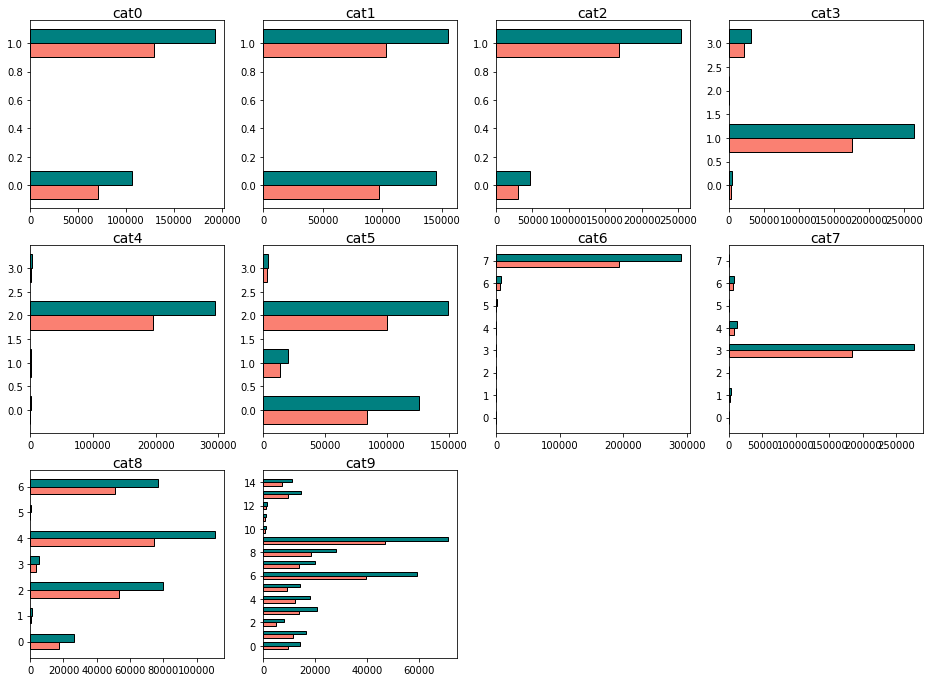

In [10]:
# Combined dataframe containing categorical features only
cat_data = pd.concat([train[cat_features], test[cat_features]], axis=0)
cat_columns = cat_data.columns.values

fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(16,20), sharex=False)

# Plots counter
i=0
for r in np.arange(0, 5, 1):
    for c in np.arange(0, 4, 1):
        if i >= len(cat_columns): # If there is no more data columns to make plots from
            axs[r, c].set_visible(False) # Hiding axes so there will be clean background
        else:

            values = cat_data[cat_columns[i]].value_counts().sort_index(ascending=False).index
            bars_pos = np.arange(0, len(values))
            if len(values)<4:
                height=0.1
            else:
                height=0.3

            bars1 = axs[r, c].barh(bars_pos+height/2,
                                   [train[train[cat_columns[i]]==x][cat_columns[i]].count() for x in values],
                                   height=height,
                                   color="teal",
                                   edgecolor="black",
                                   label="Train Dataset")
            bars2 = axs[r, c].barh(bars_pos-height/2,
                                   [test[test[cat_columns[i]]==x][cat_columns[i]].count() for x in values],
                                   height=height,
                                   color="salmon",
                                   edgecolor="black",
                                   label="Test Dataset")
            y_labels = [str(x) for x in values]

            axs[r, c].set_title(cat_features[i], fontsize=14, pad=1)                                  
        i+=1

#plt.suptitle("Categorical feature values distribution in both datasets", y=0.99)
plt.show();

Checking if test data doesn't contain categories that are not present in the train dataset

In [11]:
for col in cat_columns:
    print(set(train[col].value_counts().index) == set(test[col].value_counts().index), end=" - ")

True - True - True - True - True - True - True - True - True - True - 

Text(0.5, 1.0, 'Amount of values in categorical features')

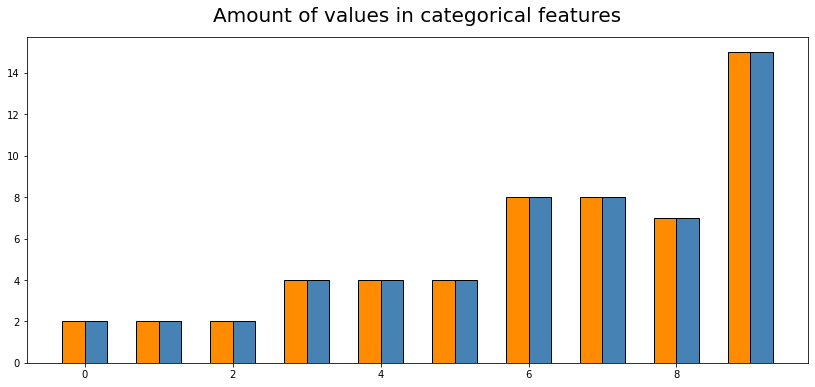

In [12]:
# Bars position should be numerical because there will be arithmetical operations with them
bars_pos = np.arange(len(cat_features))

width=0.3
fig, ax = plt.subplots(figsize=(14, 6))
# Making two bar objects. One is on the left from bar position and the other one is on the right
bars1 = ax.bar(bars_pos-width/2,
               train[cat_columns].nunique().values,
               width=width,
               color="darkorange", edgecolor="black")
bars2 = ax.bar(bars_pos+width/2,
               test[cat_columns].nunique().values,
               width=width,
               color="steelblue", edgecolor="black")
ax.set_title("Amount of values in categorical features", fontsize=20, pad=15)



## Feature correlation

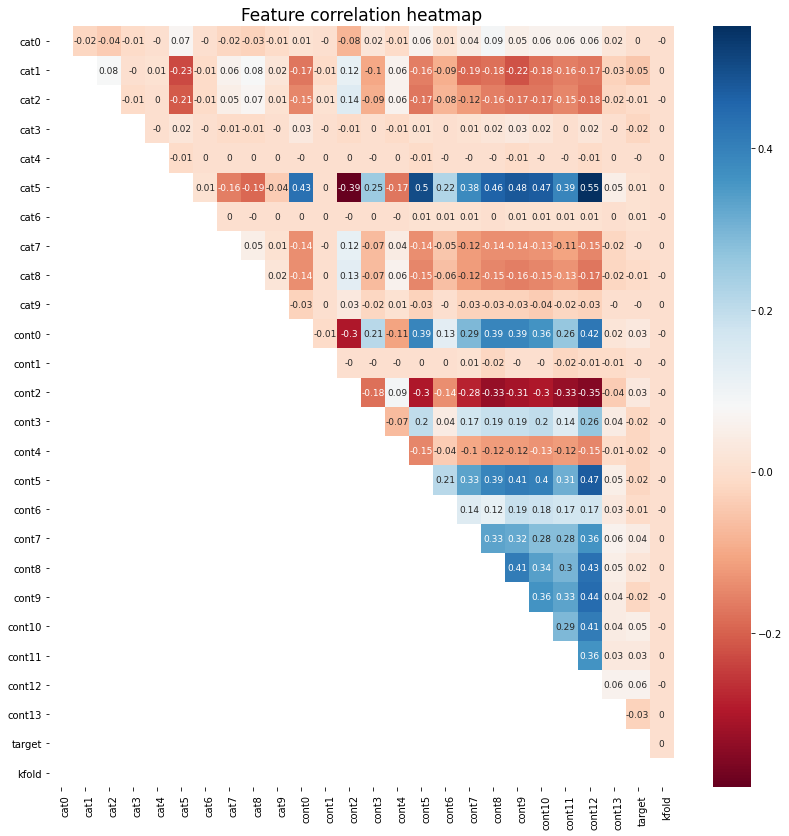

In [13]:
# Plot train dataframe

# Encoding categorical features with OrdinalEncoder
for col in cat_features:
    encoder = OrdinalEncoder()
    train[col] = encoder.fit_transform(np.array(train[col]).reshape(-1, 1))
    test[col] = encoder.transform(np.array(test[col]).reshape(-1, 1))

# Calculatin correlation values
train_corr = train.corr().round(2)

# Mask to hide upper-right part of plot as it is a duplicate
mask = np.zeros_like(train_corr)
mask[np.tril_indices_from(mask)] = True

# Making a plot
plt.figure(figsize=(14,14))
ax = sns.heatmap(train_corr, annot=True, mask=mask, cmap="RdBu", annot_kws={"weight": "normal", "fontsize":9})
ax.set_title("Feature correlation heatmap", fontsize=17)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor", weight="normal")
plt.setp(ax.get_yticklabels(), weight="normal",
         rotation_mode="anchor", rotation=0, ha="right")
plt.show();

In [14]:
%%time
# List of features more correlated
cols = test.columns
high_correlated_columns = list()
for i in range(0, len(cols)):
    for j in range(i+1, len(cols)):
        if abs(train[cols[i]].corr(train[cols[j]])) > 0.51:
            high_correlated_columns = high_correlated_columns + [cols[i], cols[j]]

print(set(high_correlated_columns))

{'cat5', 'cont12'}
CPU times: user 820 ms, sys: 1.96 ms, total: 822 ms
Wall time: 826 ms


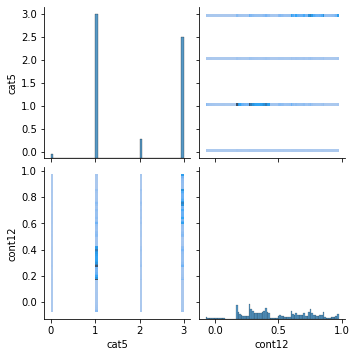

In [15]:
sns.pairplot(train[high_correlated_columns], kind="hist")

In [16]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(8,3,figsize=(16,30))
    # Adding some distance between plots
    plt.subplots_adjust(hspace = 0.3)
    for feature in features:
        i += 1
        plt.subplot(8,3,i)
        plt.scatter(df1[feature], df2[feature], marker='.')
        plt.xlabel(feature, fontsize=9)
    plt.show();



<Figure size 432x288 with 0 Axes>

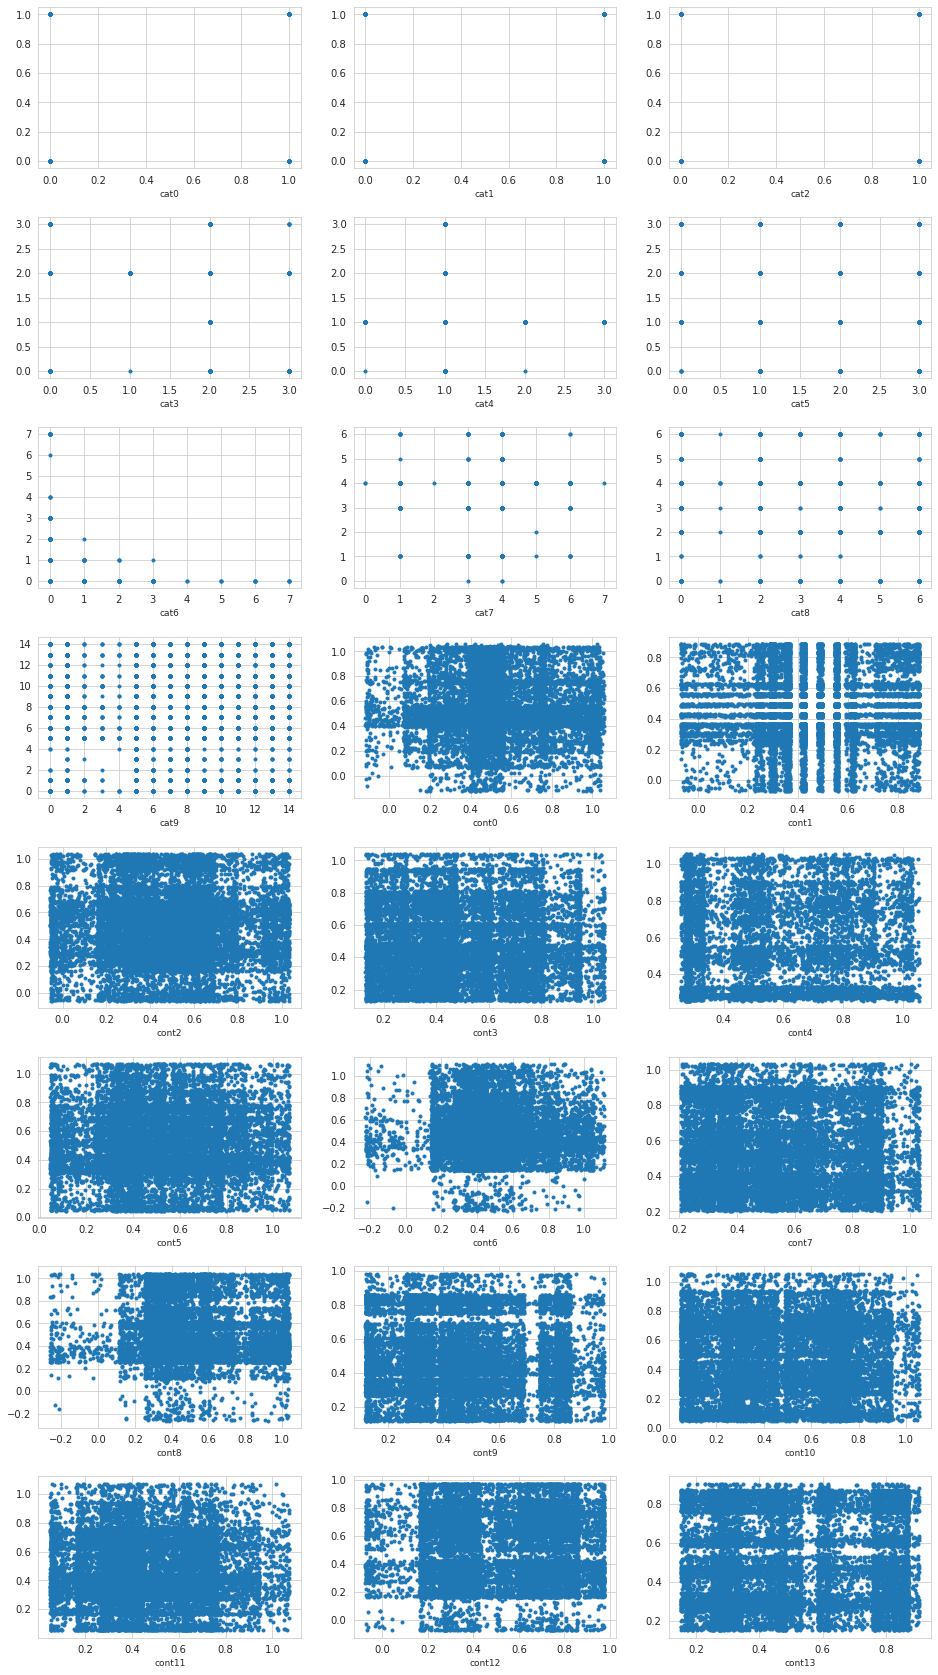

In [17]:
df_train = train.drop(['target','kfold'],axis=1)
plot_feature_scatter(df_train[:][:15000],test[:][:15000], df_train.columns)

## Features vs target

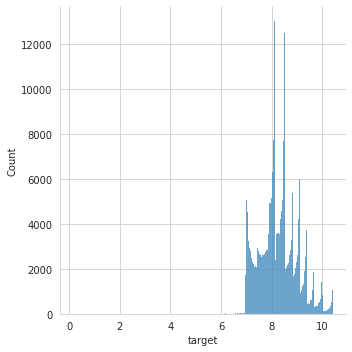

In [18]:
sns.displot(data=train, x="target")


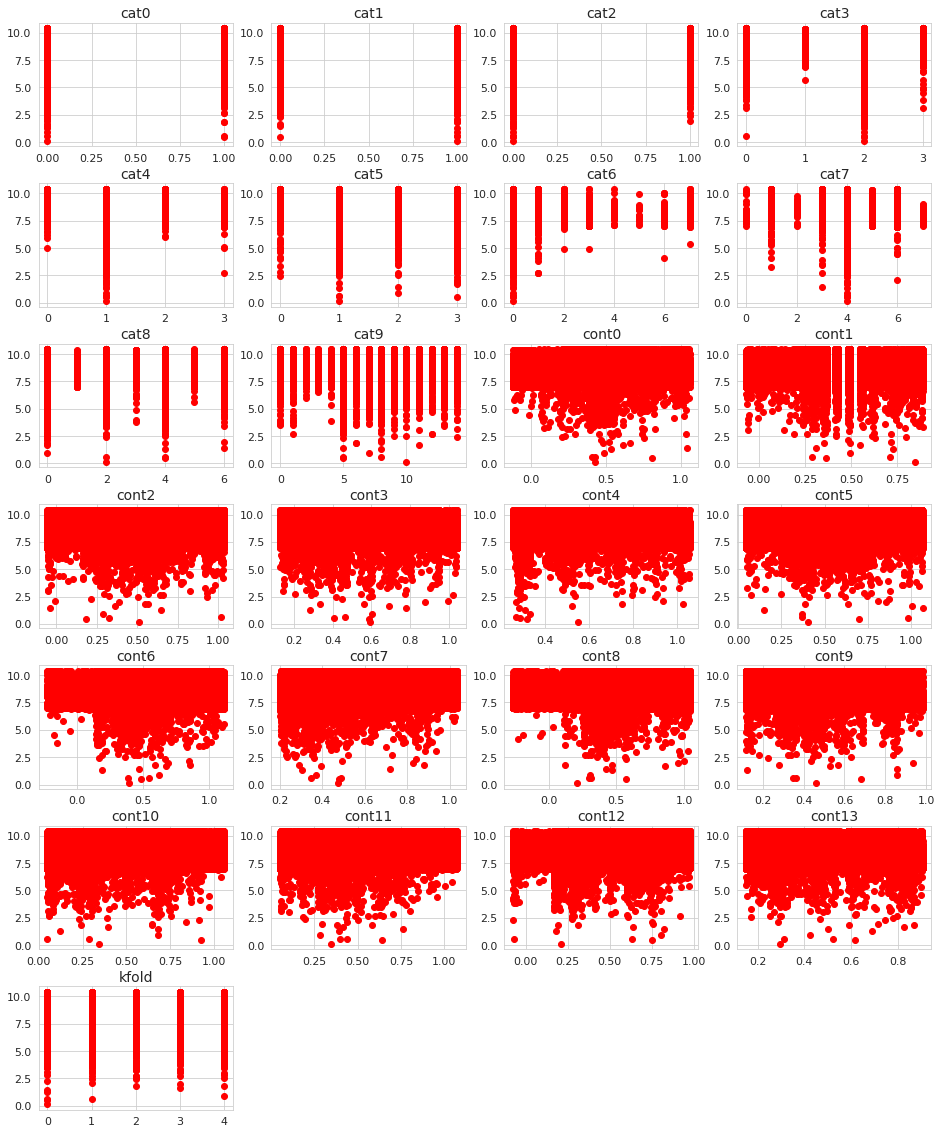

In [19]:
columns = train.drop(["target"], axis=1).columns.values

# Calculating required amount of rows to display all feature plots
cols = 4
rows = len(columns) // cols + 1

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16,20), sharex=False)

# Adding some distance between plots
plt.subplots_adjust(hspace = 0.3)

i=0
for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            scatter = axs[r, c].scatter(train[columns[i]].values,
                                        train["target"],
                                        color='red')
            axs[r, c].set_title(columns[i], fontsize=14, pad=5)
            axs[r, c].tick_params(axis="y", labelsize=11)
            axs[r, c].tick_params(axis="x", labelsize=11)
                                  
        i+=1
# plt.suptitle("Features vs target", y=0.99)
plt.show();

--------------------------

# Step 4: data preprocessing + train model 

In [20]:
# Reload the training data
train = pd.read_csv("../input/30days-kfolds/train_folds.csv", index_col=0)
test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)
sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

print ("Data reloaded")

Data reloaded


In [21]:
useful_features = [c for c in train.columns if c not in ("id", "target", "kfold")]
object_cols = [col for col in useful_features if 'cat' in col]
numerical_cols = [col for col in useful_features if 'cont' in col]
test = test[useful_features]

In [22]:
final_predictions = []
scores=[]
for fold in range(5):
    xtrain =  train[train.kfold != fold].reset_index(drop=True)
    xvalid = train[train.kfold == fold].reset_index(drop=True)
    xtest = test.copy()

    ytrain = xtrain.target
    yvalid = xvalid.target
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    
    # categorical features
    high_cardinality_cols = [col for col in object_cols if xtrain[col].nunique()>=7]
    low_cardinality_cols = [col for col in object_cols if xtrain[col].nunique()<7]
    
    
    # label encode columns with high cardinality 
    ordinal_encoder = preprocessing.OrdinalEncoder()
    xtrain[high_cardinality_cols] = ordinal_encoder.fit_transform(xtrain[high_cardinality_cols])
    xvalid[high_cardinality_cols] = ordinal_encoder.transform(xvalid[high_cardinality_cols])
    xtest[high_cardinality_cols] = ordinal_encoder.transform(xtest[high_cardinality_cols])
    
    # One hot encode columns with low cardinality 
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(xtrain[low_cardinality_cols]))
    OH_cols_valid = pd.DataFrame(OH_encoder.transform(xvalid[low_cardinality_cols]))
    OH_cols_test = pd.DataFrame(OH_encoder.transform(xtest[low_cardinality_cols]))

    # codificador one-hot elimina; ponerlo de nuevo 
    OH_cols_train.index = xtrain.index
    OH_cols_valid.index = xvalid.index
    OH_cols_test.index = xtest.index

    # Eliminar columnas categóricas (se reemplazarán con codificación one-hot) 
    num_X_train = xtrain.drop(low_cardinality_cols, axis=1)
    num_X_valid = xvalid.drop(low_cardinality_cols, axis=1)
    num_X_test= xtest.drop(low_cardinality_cols, axis=1)

    #  añadir columnas codificadas one-hot a variables numéricas 
    after_OH_xtrain = pd.concat([num_X_train, OH_cols_train], axis=1)
    after_OH_valid= pd.concat([num_X_valid, OH_cols_valid], axis=1)
    after_OH_test= pd.concat([num_X_test, OH_cols_test], axis=1) 
    
    
    # standarization
    scaler = preprocessing.StandardScaler()
    after_OH_xtrain[numerical_cols] = scaler.fit_transform(after_OH_xtrain[numerical_cols])
    after_OH_valid[numerical_cols] = scaler.transform(after_OH_valid[numerical_cols])
    after_OH_test[numerical_cols] = scaler.transform(after_OH_test[numerical_cols])
    
    model = XGBRegressor(random_state=fold, tree_method='gpu_hist', gpu_id=0,predictor='gpu_predictor',objective='reg:squarederror',)
    model.fit(after_OH_xtrain, ytrain)
    preds_valid = model.predict(after_OH_valid)
    test_preds = model.predict(after_OH_test)
    final_predictions.append(test_preds)
    rmse = mean_squared_error(yvalid, preds_valid, squared=False)
    print(fold,rmse)
    scores.append(rmse)
    
print (np.mean(scores),np.std(scores))

0 0.7246122873697035
1 0.7243913520832906
2 0.7265157247739253
3 0.7265676362687475
4 0.7258177890320424
0.7255809579055419 0.0009227022155019006


# Step 5: Submit to the competition

In [23]:
preds = np.mean(np.column_stack(final_predictions), axis=1)

sample_submission.target = preds
sample_submission.to_csv("submission.csv", index=False)